# Tarea PCA

**Desarrollado por:** Orlando Patricio Chacón Molina

**Fecha de creación:** 2022-03-02

**Fecha de actualización:** 2022-03-03

In [137]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier 
import time

In [12]:
# cargar el conjunto de datos
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
# ver la forma del conjunto de datos


In [15]:
data = pd.DataFrame(mnist.data)

In [122]:
data['target'] = mnist.target

In [123]:
data.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,target
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9


In [124]:
X = data.iloc[:,0:-1]
y = data['target']

In [125]:
scaler = StandardScaler()
scaledDf = scaler.fit_transform(X)

In [126]:
pca95 = PCA()
pca95.fit(scaledDf)

PCA()

Text(0, 0.5, 'Proportion of Explained Variance')

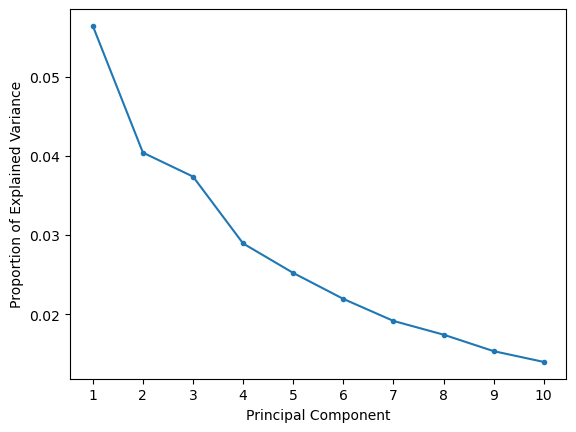

In [127]:
# Graficar los ratios de varianza explicadas de los primeros 10 componentes principales
plt.style.use('default')
plt.plot(range(1, 11), pca95.explained_variance_ratio_[:10], marker = '.')
plt.xticks(ticks = range(1, 11))
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Explained Variance')


In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)

## ¿Cuantas componentes suman el 95% de varianza?
Obtener la suma acumulada de la varianza, ordenado de mayor a menor. Dado que el vector está indexado desde cero, el número de PCAs es 332.

In [115]:
cumSumVarianza = pd.DataFrame(pca95.explained_variance_ratio_).cumsum()
cumSumVarianza[cumSumVarianza[0]>=0.95].head()

,0
331,0.950031
332,0.950388
333,0.950744
334,0.951098
335,0.951450


## Escalar los datos.
Se escalan los conjuntos train y test por separado.

In [116]:
# Instanciar Escalador Estándar
scaler = StandardScaler()
# Ajustar y transformar datos
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)


## Clasificación con Regresión logística utilizando PCA.

In [139]:
pca = PCA(n_components = 332)
X_train_pca = pca.fit_transform(X_train_sc)
X_test_pca = pca.transform(X_test_sc)

tiempoInicio = time.time()
logregClf = LogisticRegression(max_iter=1000)
logregClf.fit(X_train_pca, y_train)

tiempoTranscurrido = time.time() - tiempoInicio
print(f'{tiempoTranscurrido:.2f} transcurridos.')

print('Training accuracy:', logregClf.score(X_train_pca, y_train))
print('Testing accuracy:', logregClf.score(X_test_pca, y_test))

79.55 transcurridos.
Training accuracy: 0.9358095238095238
Testing accuracy: 0.9254285714285714


## Clasificación con KNN utilizando PCA.

In [140]:

pca = PCA(n_components = 332)
X_train_pca = pca.fit_transform(X_train_sc)
X_test_pca = pca.transform(X_test_sc)

tiempoInicio = time.time()
knnClf = KNeighborsClassifier(n_neighbors=4, weights='distance')
knnClf.fit(X_train_pca, y_train)

tiempoTranscurrido = time.time() - tiempoInicio
print(f'{tiempoTranscurrido:.2f} transcurridos.')

print('Training accuracy:', knnClf.score(X_train_pca, y_train))
print('Testing accuracy:', knnClf.score(X_test_pca, y_test))

0.17 transcurridos.
Training accuracy: 1.0
Testing accuracy: 0.9530285714285714


In [141]:
print('Testing accuracy:', knnClf.score(X_test_pca[0:30,:], y_test[0:30]))

Testing accuracy: 0.9333333333333333


## Clasificación con Random Forest utilizando PCA.

In [142]:
pca = PCA(n_components = 332)
X_train_pca = pca.fit_transform(X_train_sc)
X_test_pca = pca.transform(X_test_sc)

tiempoInicio = time.time()
rfClf = RandomForestClassifier(bootstrap=True, max_depth=40,
            max_features='auto', n_jobs=100,
            oob_score=True, random_state=3)

rfClf.fit(X_train_pca, y_train)

tiempoTranscurrido = time.time() - tiempoInicio
print(f'{tiempoTranscurrido:.2f} transcurridos.')

print('Training accuracy:', rfClf.score(X_train_pca, y_train))
print('Testing accuracy:', rfClf.score(X_test_pca, y_test))

30.33 transcurridos.
Training accuracy: 1.0
Testing accuracy: 0.9337142857142857
